In [1]:
%matplotlib notebook
import gba
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = gba.GbA()
g.init()

In [3]:
data = np.array([[0.00038221, 0.00067219, 0.00056877, 0.0014739, 
                  0.0022047, 0.0031288, 0.0015537, 0.00038673, 
                  0.00012311]])
nsim = 30
mean = np.zeros((2))
cov = np.zeros((2,2))
g.compute_likelihood(data,nsim,mean,cov)

<IPython.core.display.Javascript object>


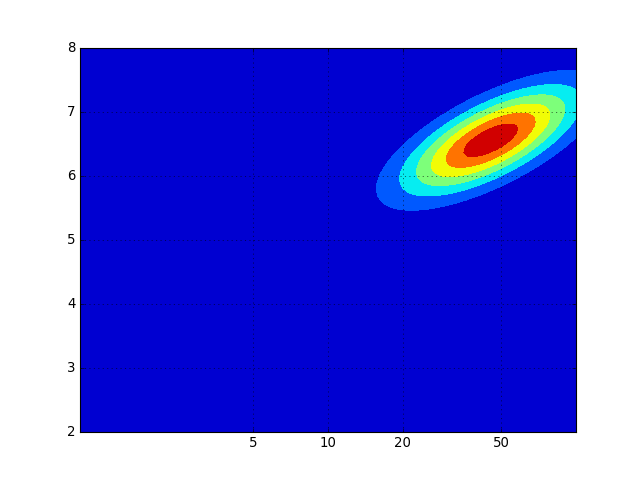

In [4]:
import scipy.stats as stats
m = np.linspace(2, 8, 100)
r = np.log10(np.linspace(1,100,200))
M, R = np.meshgrid(m, r)
pos = np.empty(M.shape + (2,))
pos[:, :, 0] = R; pos[:, :, 1] = M
rv = stats.multivariate_normal(mean, cov)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(R, M, rv.pdf(pos))
ax.set_xticks([np.log10(x) for x in [5,10,20,50]])
ax.set_xticklabels([5,10,20,50])
ax.grid()

In [23]:
p = rv.pdf(pos)
dr = np.diff(r).mean()
dm = np.diff(m).mean()
mp = p.sum(axis=0)*dr

In [24]:
np.sum(m*mp)*dm

13.284621934561399

In [6]:
cov

array([[ 0.05588882,  0.09200855],
       [ 0.09200855,  0.31487644]])